In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('placement2.csv')


In [6]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

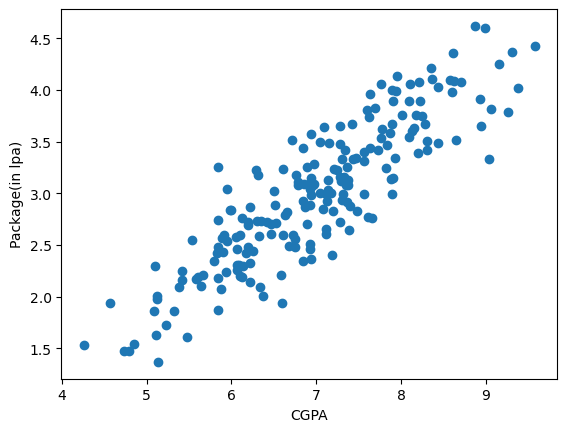

In [8]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [10]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
from sklearn.linear_model import LinearRegression


In [24]:
X_train

,cgpa
137,7.14
163,8.93
111,5.42
123,5.10
109,7.77
...,...
43,7.66
22,6.14
72,7.78
15,7.25


In [26]:
lr = LinearRegression()



In [28]:
lr.fit(X_train,y_train)


LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

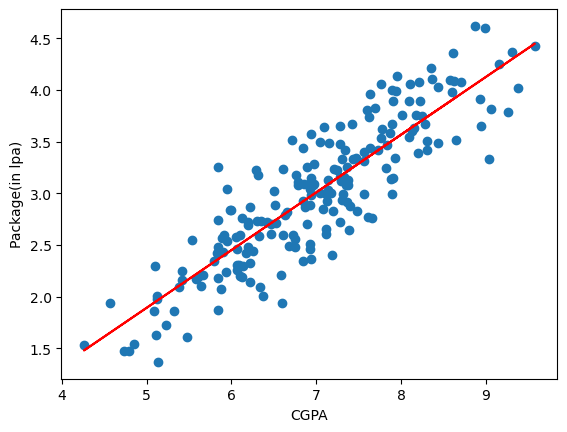

In [30]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [34]:
y_pred = lr.predict(X_test)


In [36]:
y_test.values


array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [38]:
print("MAE",mean_absolute_error(y_test,y_pred))


MAE 0.2884710931878175


In [40]:
print("MSE",mean_squared_error(y_test,y_pred))


MSE 0.12129235313495527


In [42]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE 0.34827051717731616


In [44]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

MSE 0.780730147510384


In [46]:
X_test.shape


(40, 1)

In [48]:
1 - ((1-r2)*(40-1)/(40-1-1))


0.7749598882343415

In [50]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.735665,3.26
1,5.12,0.732103,1.98
2,7.82,0.394012,3.25
3,7.42,0.883762,3.67
4,6.94,0.482137,3.57


Text(0, 0.5, 'Package(in lpa)')

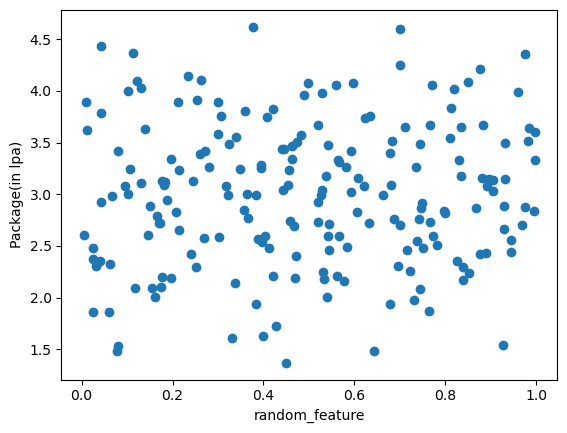

In [52]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [54]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [58]:
lr = LinearRegression()


In [60]:
lr.fit(X_train,y_train)


LinearRegression()

In [62]:
y_pred = lr.predict(X_test)


In [64]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7847603526264205


In [66]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.7731257770927136

In [68]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [70]:
new_df2.sample(5)


,cgpa,iq,package
38,8.62,4.86,4.36
63,9.16,5.15,4.25
28,5.94,3.14,2.24
69,7.30,3.94,2.94
10,5.32,0.76,1.86


Text(0, 0.5, 'Package(in lpa)')

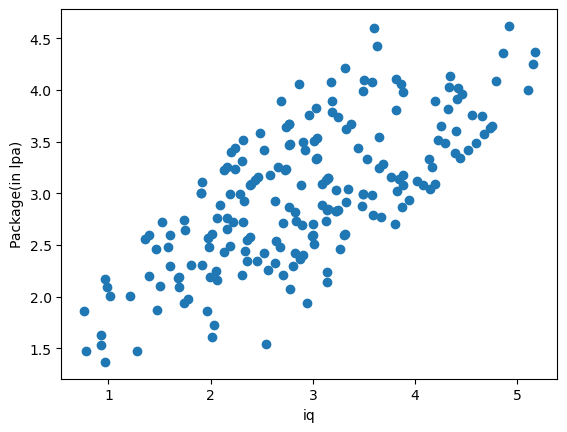

In [76]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [78]:
np.random.randint(-100,100)


-81

In [80]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [84]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [86]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.807975746563351


In [88]:
1 - ((1-r2)*(40-1)/(40-1-2))


0.7975960571883971